In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

In [2]:
basedir = './국토교통부_실거래가_공개시스템/연립다세대/'
filenames = [f for f in os.listdir(basedir) if (f.endswith('.csv'))&('매매' in f)]
filenames

['연립다세대(매매)_20130101_20131231.csv',
 '연립다세대(매매)_20140101_20141231.csv',
 '연립다세대(매매)_20150101_20151231.csv',
 '연립다세대(매매)_20160101_20161231.csv',
 '연립다세대(매매)_20170101_20171231.csv',
 '연립다세대(매매)_20180101_20181231.csv',
 '연립다세대(매매)_20190101_20191231.csv',
 '연립다세대(매매)_20200101_20201231.csv']

In [3]:
for i, f in enumerate(filenames):
    chunk = pd.read_csv(basedir + f, chunksize=1, encoding='euc-kr', header=15)
    df = next(chunk)
    print(df.shape)
    if df.shape[1] != 13:
        df = df.drop(columns=['해제사유발생일'])
        
    display(df.head())
    
    if i == 0:
        first_cols = df.columns
    else:
        print(df.columns == first_cols)

(1, 13)


,시군구,번지,본번,부번,건물명,전용면적(㎡),대지권면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명
0,서울특별시 강남구 개포동,1172-2,1172,2,(1172-2),42.15,24.67,201304,26,"25,000",3,2012,논현로6길 22-6


(1, 13)


,시군구,번지,본번,부번,건물명,전용면적(㎡),대지권면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명
0,서울특별시 강남구 개포동,1196-11,1196,11,(1196-11),57.66,35.48,201412,2,"33,000",3,2014,논현로12길 9-10


[ True  True  True  True  True  True  True  True  True  True  True  True
  True]
(1, 13)


,시군구,번지,본번,부번,건물명,전용면적(㎡),대지권면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명
0,서울특별시 강남구 개포동,1216-4,1216,4,(1216-4),33.77,21.67,201503,26,"24,800",4,2012,개포로26길 16


[ True  True  True  True  True  True  True  True  True  True  True  True
  True]
(1, 13)


,시군구,번지,본번,부번,건물명,전용면적(㎡),대지권면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명
0,서울특별시 강남구 개포동,1164-27,1164,27,(1164-27),51.75,38.86,201608,29,"55,500",6,2016,논현로2길 66


[ True  True  True  True  True  True  True  True  True  True  True  True
  True]
(1, 13)


,시군구,번지,본번,부번,건물명,전용면적(㎡),대지권면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명
0,서울특별시 강남구 개포동,1164-27,1164,27,(1164-27),51.78,36.36,201701,25,"52,000",3,2016,논현로2길 66


[ True  True  True  True  True  True  True  True  True  True  True  True
  True]
(1, 13)


,시군구,번지,본번,부번,건물명,전용면적(㎡),대지권면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명
0,서울특별시 강남구 개포동,1172-2,1172,2,(1172-2),29.95,17.61,201801,13,"25,000",4,2012,논현로6길 22-6


[ True  True  True  True  True  True  True  True  True  True  True  True
  True]
(1, 13)


,시군구,번지,본번,부번,건물명,전용면적(㎡),대지권면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명
0,서울특별시 강남구 개포동,1164-27,1164,27,(1164-27),51.78,36.36,201902,26,"55,000",3,2016,논현로2길 66


[ True  True  True  True  True  True  True  True  True  True  True  True
  True]
(1, 14)


,시군구,번지,본번,부번,건물명,전용면적(㎡),대지권면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명
0,서울특별시 강남구 개포동,1164-27,1164,27,(1164-27),51.78,38.86,202004,10,"57,000",5,2016,논현로2길 66


[ True  True  True  True  True  True  True  True  True  True  True  True
  True]


In [4]:
dfs_list = []
for i, f in tqdm(enumerate(filenames)):
    df = pd.read_csv(basedir + f, encoding='euc-kr', header=15)
    if df.shape[1] != 13:
        df = df.drop(columns=['해제사유발생일'])
    
    dfs_list.append(df)    

8it [00:00, 10.66it/s]


In [5]:
concat_df = pd.concat(dfs_list).reset_index(drop=True)
print(concat_df.shape)
concat_df.head()

(377577, 13)


,시군구,번지,본번,부번,건물명,전용면적(㎡),대지권면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명
0,서울특별시 강남구 개포동,1172-2,1172,2,(1172-2),42.15,24.67,201304,26,"25,000",3,2012.0,논현로6길 22-6
1,서울특별시 강남구 개포동,1172-2,1172,2,(1172-2),42.15,24.67,201306,4,"25,000",3,2012.0,논현로6길 22-6
2,서울특별시 강남구 개포동,1172-2,1172,2,(1172-2),42.15,24.67,201310,25,"24,500",2,2012.0,논현로6길 22-6
3,서울특별시 강남구 개포동,1216-4,1216,4,(1216-4),37.18,23.86,201302,13,"27,800",5,2012.0,개포로26길 16
4,서울특별시 강남구 개포동,1216-4,1216,4,(1216-4),35.87,23.02,201304,26,"26,500",3,2012.0,개포로26길 16


In [6]:
concat_df.rename(columns={'전용면적(㎡)':'전용면적', '대지권면적(㎡)':'대지권면적'}, inplace=True)

In [7]:
concat_df['계약년도'] = concat_df['계약년월'].apply(lambda x: int(str(x)[:4]))

In [8]:
concat_df.head()

,시군구,번지,본번,부번,건물명,전용면적,대지권면적,계약년월,계약일,거래금액(만원),층,건축년도,도로명,계약년도
0,서울특별시 강남구 개포동,1172-2,1172,2,(1172-2),42.15,24.67,201304,26,"25,000",3,2012.0,논현로6길 22-6,2013
1,서울특별시 강남구 개포동,1172-2,1172,2,(1172-2),42.15,24.67,201306,4,"25,000",3,2012.0,논현로6길 22-6,2013
2,서울특별시 강남구 개포동,1172-2,1172,2,(1172-2),42.15,24.67,201310,25,"24,500",2,2012.0,논현로6길 22-6,2013
3,서울특별시 강남구 개포동,1216-4,1216,4,(1216-4),37.18,23.86,201302,13,"27,800",5,2012.0,개포로26길 16,2013
4,서울특별시 강남구 개포동,1216-4,1216,4,(1216-4),35.87,23.02,201304,26,"26,500",3,2012.0,개포로26길 16,2013


In [9]:
concat_df['건물연식'] = concat_df['계약년도'] - concat_df['건축년도']

In [10]:
concat_df['건물연식'].describe()

count    377560.000000
mean         14.307284
std          11.104991
min          -1.000000
25%           4.000000
50%          14.000000
75%          24.000000
max          89.000000
Name: 건물연식, dtype: float64

In [11]:
negative_df = concat_df[concat_df['건물연식'] < 0]
print(negative_df.shape)
negative_df.head()

(9, 15)


,시군구,번지,본번,부번,건물명,전용면적,대지권면적,계약년월,계약일,거래금액(만원),층,건축년도,도로명,계약년도,건물연식
238065,서울특별시 광진구 군자동,504,504,0,대명이튼캐슬,28.900,19.39,201809,12,"30,500",5,2019.0,군자로10길 17,2018,-1.0
280133,서울특별시 강서구 화곡동,102-182,102,182,동일네오빌,24.870,13.58,201912,1,"25,000",5,2020.0,초록마을로34길 85,2019,-1.0
280134,서울특별시 강서구 화곡동,102-182,102,182,동일네오빌,24.870,13.58,201912,1,"25,000",6,2020.0,초록마을로34길 85,2019,-1.0
298456,서울특별시 서초구 방배동,426-1,426,1,방배 노블루체 서리풀,24.384,10.42,201911,27,"52,616",11,2020.0,방배천로22길 4,2019,-1.0
298457,서울특별시 서초구 방배동,426-1,426,1,방배 노블루체 서리풀,21.350,9.12,201912,16,"52,218",10,2020.0,방배천로22길 4,2019,-1.0


In [12]:
negative_df

,시군구,번지,본번,부번,건물명,전용면적,대지권면적,계약년월,계약일,거래금액(만원),층,건축년도,도로명,계약년도,건물연식
238065,서울특별시 광진구 군자동,504,504,0,대명이튼캐슬,28.900,19.39,201809,12,"30,500",5,2019.0,군자로10길 17,2018,-1.0
280133,서울특별시 강서구 화곡동,102-182,102,182,동일네오빌,24.870,13.58,201912,1,"25,000",5,2020.0,초록마을로34길 85,2019,-1.0
280134,서울특별시 강서구 화곡동,102-182,102,182,동일네오빌,24.870,13.58,201912,1,"25,000",6,2020.0,초록마을로34길 85,2019,-1.0
298456,서울특별시 서초구 방배동,426-1,426,1,방배 노블루체 서리풀,24.384,10.42,201911,27,"52,616",11,2020.0,방배천로22길 4,2019,-1.0
298457,서울특별시 서초구 방배동,426-1,426,1,방배 노블루체 서리풀,21.350,9.12,201912,16,"52,218",10,2020.0,방배천로22길 4,2019,-1.0
298458,서울특별시 서초구 방배동,426-1,426,1,방배 노블루체 서리풀,24.384,10.42,201912,26,"52,351",10,2020.0,방배천로22길 4,2019,-1.0
306121,서울특별시 양천구 신월동,421-1,421,1,웨인빌,38.890,23.41,201912,1,"27,200",4,2020.0,남부순환로67길 16,2019,-1.0
332998,서울특별시 광진구 자양동,227-71,227,71,대원빌19차,44.920,22.20,202012,29,"48,800",6,2021.0,자양번영로11길 32,2020,-1.0
364787,서울특별시 영등포구 신길동,261-12,261,12,서경팰리스101,24.370,5.79,202011,26,"29,400",14,2021.0,가마산로 466,2020,-1.0


In [13]:
concat_df['거래금액(만원)'] = concat_df['거래금액(만원)'].apply(lambda x: int(str(x).replace(',','')))

In [14]:
concat_df['가격/전용면적'] = concat_df['거래금액(만원)'] / concat_df['전용면적']
concat_df['가격/대지권면적'] = concat_df['거래금액(만원)'] / concat_df['대지권면적']

In [15]:
count = 0
for addr in concat_df['도로명'].unique():
    addr_df = concat_df[concat_df['도로명'] == addr]
    print(addr_df.shape)
    display(addr_df.head())
    count += 1
    if count > 10:
        break

(6, 17)


,시군구,번지,본번,부번,건물명,전용면적,대지권면적,계약년월,계약일,거래금액(만원),층,건축년도,도로명,계약년도,건물연식,가격/전용면적,가격/대지권면적
0,서울특별시 강남구 개포동,1172-2,1172,2,(1172-2),42.15,24.67,201304,26,25000,3,2012.0,논현로6길 22-6,2013,1.0,593.119810,1013.376571
1,서울특별시 강남구 개포동,1172-2,1172,2,(1172-2),42.15,24.67,201306,4,25000,3,2012.0,논현로6길 22-6,2013,1.0,593.119810,1013.376571
2,서울특별시 강남구 개포동,1172-2,1172,2,(1172-2),42.15,24.67,201310,25,24500,2,2012.0,논현로6길 22-6,2013,1.0,581.257414,993.109039
117707,서울특별시 강남구 개포동,1172-2,1172,2,(1172-2),42.15,24.67,201606,29,29900,2,2012.0,논현로6길 22-6,2016,4.0,709.371293,1211.998379
225573,서울특별시 강남구 개포동,1172-2,1172,2,(1172-2),29.95,17.61,201801,13,25000,4,2012.0,논현로6길 22-6,2018,6.0,834.724541,1419.647927


(13, 17)


,시군구,번지,본번,부번,건물명,전용면적,대지권면적,계약년월,계약일,거래금액(만원),층,건축년도,도로명,계약년도,건물연식,가격/전용면적,가격/대지권면적
3,서울특별시 강남구 개포동,1216-4,1216,4,(1216-4),37.18,23.86,201302,13,27800,5,2012.0,개포로26길 16,2013,1.0,747.713825,1165.129925
4,서울특별시 강남구 개포동,1216-4,1216,4,(1216-4),35.87,23.02,201304,26,26500,3,2012.0,개포로26길 16,2013,1.0,738.778924,1151.172893
28860,서울특별시 강남구 개포동,1216-4,1216,4,(1216-4),35.87,23.02,201406,7,25800,2,2012.0,개포로26길 16,2014,2.0,719.264009,1120.764553
28861,서울특별시 강남구 개포동,1216-4,1216,4,(1216-4),29.97,19.23,201409,15,21000,2,2012.0,개포로26길 16,2014,2.0,700.700701,1092.043682
63109,서울특별시 강남구 개포동,1216-4,1216,4,(1216-4),33.77,21.67,201503,26,24800,4,2012.0,개포로26길 16,2015,3.0,734.379627,1144.439317


(9, 17)


,시군구,번지,본번,부번,건물명,전용면적,대지권면적,계약년월,계약일,거래금액(만원),층,건축년도,도로명,계약년도,건물연식,가격/전용면적,가격/대지권면적
5,서울특별시 강남구 개포동,1205-1,1205,1,W하우스,51.69,31.15,201309,25,41000,5,2012.0,개포로26길 20,2013,1.0,793.190172,1316.211878
6,서울특별시 강남구 개포동,1205-1,1205,1,W하우스,46.29,27.89,201312,16,40000,5,2012.0,개포로26길 20,2013,1.0,864.117520,1434.205809
7,서울특별시 강남구 개포동,1205-1,1205,1,W하우스,55.13,33.21,201312,16,37700,3,2012.0,개포로26길 20,2013,1.0,683.838201,1135.200241
8,서울특별시 강남구 개포동,1205-1,1205,1,W하우스,55.13,33.21,201312,20,37500,4,2012.0,개포로26길 20,2013,1.0,680.210412,1129.177958
9,서울특별시 강남구 개포동,1205-1,1205,1,W하우스,55.13,33.21,201312,24,37500,3,2012.0,개포로26길 20,2013,1.0,680.210412,1129.177958


(3, 17)


,시군구,번지,본번,부번,건물명,전용면적,대지권면적,계약년월,계약일,거래금액(만원),층,건축년도,도로명,계약년도,건물연식,가격/전용면적,가격/대지권면적
10,서울특별시 강남구 개포동,1252-1,1252,1,건양빌리지,139.50,70.0,201311,11,59000,4,1991.0,개포로25길 27,2013,22.0,422.939068,842.857143
63124,서울특별시 강남구 개포동,1252-1,1252,1,건양빌리지,134.77,67.7,201508,13,75000,3,1991.0,개포로25길 27,2015,24.0,556.503673,1107.828656
117732,서울특별시 강남구 개포동,1252-1,1252,1,건양빌리지,134.77,67.7,201604,24,74500,1,1991.0,개포로25길 27,2016,25.0,552.793648,1100.443131


(5, 17)


,시군구,번지,본번,부번,건물명,전용면적,대지권면적,계약년월,계약일,거래금액(만원),층,건축년도,도로명,계약년도,건물연식,가격/전용면적,가격/대지권면적
11,서울특별시 강남구 개포동,1202-2,1202,2,경모하이츠,51.69,21.2,201303,13,20500,3,1991.0,개포로22길 41-6,2013,22.0,396.595086,966.981132
28873,서울특별시 강남구 개포동,1202-2,1202,2,경모하이츠,51.69,21.2,201404,8,22000,2,1991.0,개포로22길 41-6,2014,23.0,425.614239,1037.735849
28874,서울특별시 강남구 개포동,1202-2,1202,2,경모하이츠,51.69,21.2,201410,3,15300,-1,1991.0,개포로22길 41-6,2014,23.0,295.995357,721.698113
63125,서울특별시 강남구 개포동,1202-2,1202,2,경모하이츠,51.69,21.2,201507,3,18500,-1,1991.0,개포로22길 41-6,2015,24.0,357.902883,872.641509
315614,서울특별시 강남구 개포동,1202-2,1202,2,경모하이츠,51.69,21.2,202005,6,25000,3,1991.0,개포로22길 41-6,2020,29.0,483.652544,1179.245283


(5, 17)


,시군구,번지,본번,부번,건물명,전용면적,대지권면적,계약년월,계약일,거래금액(만원),층,건축년도,도로명,계약년도,건물연식,가격/전용면적,가격/대지권면적
12,서울특별시 강남구 개포동,1235-16,1235,16,광현빌라,50.22,27.63,201309,3,28000,2,2001.0,논현로18길 10-13,2013,12.0,557.546794,1013.391241
117736,서울특별시 강남구 개포동,1235-16,1235,16,광현빌라,57.51,31.64,201606,16,31800,1,2001.0,논현로18길 10-13,2016,15.0,552.947314,1005.056890
117737,서울특별시 강남구 개포동,1235-16,1235,16,광현빌라,45.80,25.20,201609,26,26000,1,2001.0,논현로18길 10-13,2016,15.0,567.685590,1031.746032
174912,서울특별시 강남구 개포동,1235-16,1235,16,광현빌라,77.34,42.55,201712,23,45000,4,2001.0,논현로18길 10-13,2017,16.0,581.846393,1057.579318
225596,서울특별시 강남구 개포동,1235-16,1235,16,광현빌라,50.22,27.63,201802,6,30000,2,2001.0,논현로18길 10-13,2018,17.0,597.371565,1085.776330


(4, 17)


,시군구,번지,본번,부번,건물명,전용면적,대지권면적,계약년월,계약일,거래금액(만원),층,건축년도,도로명,계약년도,건물연식,가격/전용면적,가격/대지권면적
13,서울특별시 강남구 개포동,1261-8,1261,8,금광,43.26,21.09,201311,4,19950,1,1992.0,개포로31길 9-6,2013,21.0,461.165049,945.945946
174921,서울특별시 강남구 개포동,1261-8,1261,8,금광,34.68,16.91,201703,29,15000,-1,1992.0,개포로31길 9-6,2017,25.0,432.525952,887.049083
174922,서울특별시 강남구 개포동,1261-8,1261,8,금광,55.37,26.99,201710,23,32300,4,1992.0,개포로31길 9-6,2017,25.0,583.348384,1196.739533
315621,서울특별시 강남구 개포동,1261-8,1261,8,금광,43.26,21.09,202011,10,31000,1,1992.0,개포로31길 9-6,2020,28.0,716.597319,1469.890944


(4, 17)


,시군구,번지,본번,부번,건물명,전용면적,대지권면적,계약년월,계약일,거래금액(만원),층,건축년도,도로명,계약년도,건물연식,가격/전용면적,가격/대지권면적
14,서울특별시 강남구 개포동,1219-9,1219,9,금풍빌라,50.07,47.4,201304,30,32000,2,1988.0,개포로20길 39,2013,25.0,639.105253,675.105485
15,서울특별시 강남구 개포동,1219-9,1219,9,금풍빌라,50.07,47.4,201309,25,34300,1,1988.0,개포로20길 39,2013,25.0,685.040943,723.628692
117745,서울특별시 강남구 개포동,1219-9,1219,9,금풍빌라,50.07,47.4,201610,14,38000,1,1988.0,개포로20길 39,2016,28.0,758.937488,801.687764
174927,서울특별시 강남구 개포동,1219-9,1219,9,금풍빌라,50.07,47.4,201706,5,37400,2,1988.0,개포로20길 39,2017,29.0,746.954264,789.029536


(6, 17)


,시군구,번지,본번,부번,건물명,전용면적,대지권면적,계약년월,계약일,거래금액(만원),층,건축년도,도로명,계약년도,건물연식,가격/전용면적,가격/대지권면적
16,서울특별시 강남구 개포동,1219-8,1219,8,금호빌,42.66,23.19,201307,1,19800,4,1997.0,개포로20길 43,2013,16.0,464.135021,853.816300
28878,서울특별시 강남구 개포동,1219-8,1219,8,금호빌,42.66,23.19,201410,8,23500,4,1997.0,개포로20길 43,2014,17.0,550.867323,1013.367831
63132,서울특별시 강남구 개포동,1219-8,1219,8,금호빌,54.73,29.75,201508,30,21000,-1,1997.0,개포로20길 43,2015,18.0,383.701809,705.882353
117746,서울특별시 강남구 개포동,1219-8,1219,8,금호빌,57.46,31.23,201606,27,34000,3,1997.0,개포로20길 43,2016,19.0,591.715976,1088.696766
117747,서울특별시 강남구 개포동,1219-8,1219,8,금호빌,34.63,18.82,201607,30,20000,4,1997.0,개포로20길 43,2016,19.0,577.533930,1062.699256


(6, 17)


,시군구,번지,본번,부번,건물명,전용면적,대지권면적,계약년월,계약일,거래금액(만원),층,건축년도,도로명,계약년도,건물연식,가격/전용면적,가격/대지권면적
17,서울특별시 강남구 개포동,1216-8,1216,8,노블레스(1216-8),58.17,27.88,201308,3,32700,4,2006.0,개포로24길 11,2013,7.0,562.145436,1172.883788
63134,서울특별시 강남구 개포동,1216-8,1216,8,노블레스(1216-8),58.17,27.88,201508,21,37500,4,2006.0,개포로24길 11,2015,9.0,644.662197,1345.050215
117750,서울특별시 강남구 개포동,1216-8,1216,8,노블레스(1216-8),78.66,37.70,201603,25,45800,2,2006.0,개포로24길 11,2016,10.0,582.252733,1214.854111
174929,서울특별시 강남구 개포동,1216-8,1216,8,노블레스(1216-8),78.66,37.70,201703,30,45000,4,2006.0,개포로24길 11,2017,11.0,572.082380,1193.633952
174930,서울특별시 강남구 개포동,1216-8,1216,8,노블레스(1216-8),58.17,27.88,201706,14,39900,3,2006.0,개포로24길 11,2017,11.0,685.920578,1431.133429


(4, 17)


,시군구,번지,본번,부번,건물명,전용면적,대지권면적,계약년월,계약일,거래금액(만원),층,건축년도,도로명,계약년도,건물연식,가격/전용면적,가격/대지권면적
18,서울특별시 강남구 개포동,1184-21,1184,21,뉴아트빌라,67.62,40.17,201312,11,29000,4,1997.0,논현로8길 29,2013,16.0,428.867199,721.931790
63139,서울특별시 강남구 개포동,1184-21,1184,21,뉴아트빌라,57.54,34.19,201509,5,28000,2,1997.0,논현로8길 29,2015,18.0,486.618005,818.952910
63141,서울특별시 강남구 개포동,1184-21,1184,21,뉴아트빌라,57.54,34.19,201512,23,30000,1,1997.0,논현로8길 29,2015,18.0,521.376434,877.449547
174947,서울특별시 강남구 개포동,1184-21,1184,21,뉴아트빌라,55.74,33.12,201708,30,33000,3,1997.0,논현로8길 29,2017,20.0,592.034446,996.376812


In [16]:
concat_df['가격/전용면적'].describe()

count    377577.000000
mean        515.700402
std         281.855816
min           7.959973
25%         329.864520
50%         448.667195
75%         620.155039
max        8248.648649
Name: 가격/전용면적, dtype: float64

<AxesSubplot:>

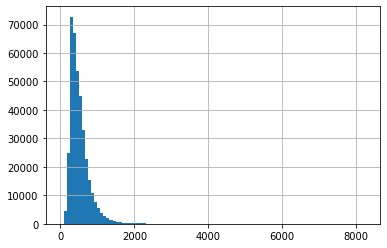

In [17]:
concat_df['가격/전용면적'].hist(bins=100)

In [18]:
q1 = concat_df['가격/전용면적'].quantile(0.25)
q3 = concat_df['가격/전용면적'].quantile(0.75)
iqr_range = q3 - q1
outlier_step = iqr_range * 1.5
outlier_df = concat_df[(concat_df['가격/전용면적'] < q1 - outlier_step)|(concat_df['가격/전용면적'] > q3 + outlier_step)]
print(outlier_df.shape)
outlier_df.head()

(16340, 17)


,시군구,번지,본번,부번,건물명,전용면적,대지권면적,계약년월,계약일,거래금액(만원),층,건축년도,도로명,계약년도,건물연식,가격/전용면적,가격/대지권면적
87,서울특별시 강남구 논현동,188-6,188,6,(188-6),14.52,9.52,201310,13,15500,5,2013.0,강남대로120길 74,2013,0.0,1067.493113,1628.151261
97,서울특별시 강남구 논현동,193-4,193,4,(193-4),14.50,8.96,201312,2,17000,3,2011.0,논현로113길 21,2013,2.0,1172.413793,1897.321429
111,서울특별시 강남구 논현동,149-33,149,33,더스마트빌리지,16.41,10.21,201307,2,17500,3,2012.0,논현로123길 54,2013,1.0,1066.422913,1714.005877
114,서울특별시 강남구 논현동,149-33,149,33,더스마트빌리지,16.45,10.23,201308,13,17400,2,2012.0,논현로123길 54,2013,1.0,1057.750760,1700.879765
115,서울특별시 강남구 논현동,149-33,149,33,더스마트빌리지,16.41,10.21,201308,13,17400,2,2012.0,논현로123길 54,2013,1.0,1060.329068,1704.211557


<AxesSubplot:>

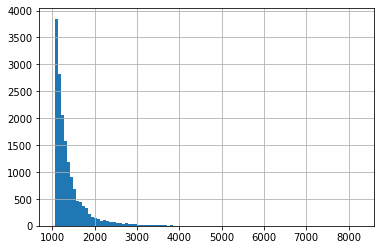

In [19]:
outlier_df['가격/전용면적'].hist(bins=100)

In [20]:
concat_df['가격/대지권면적'].describe()

count    377577.000000
mean        862.031263
std         498.849116
min           0.000033
25%         568.965517
50%         759.778598
75%        1024.685608
max       13238.289206
Name: 가격/대지권면적, dtype: float64

<AxesSubplot:>

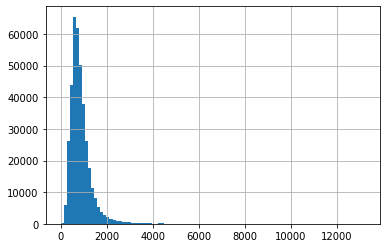

In [21]:
concat_df['가격/대지권면적'].hist(bins=100)

In [22]:
q1 = concat_df['가격/대지권면적'].quantile(0.25)
q3 = concat_df['가격/대지권면적'].quantile(0.75)
iqr_range = q3 - q1
outlier_step = iqr_range * 1.5
outlier_df = concat_df[(concat_df['가격/대지권면적'] < q1 - outlier_step)|(concat_df['가격/대지권면적'] > q3 + outlier_step)]
print(outlier_df.shape)
outlier_df.head()

(17498, 17)


,시군구,번지,본번,부번,건물명,전용면적,대지권면적,계약년월,계약일,거래금액(만원),층,건축년도,도로명,계약년도,건물연식,가격/전용면적,가격/대지권면적
89,서울특별시 강남구 논현동,188-6,188,6,(188-6),19.57,9.52,201311,23,17000,5,2013.0,강남대로120길 74,2013,0.0,868.676546,1785.714286
90,서울특별시 강남구 논현동,188-6,188,6,(188-6),21.09,9.52,201311,27,17000,5,2013.0,강남대로120길 74,2013,0.0,806.069227,1785.714286
97,서울특별시 강남구 논현동,193-4,193,4,(193-4),14.50,8.96,201312,2,17000,3,2011.0,논현로113길 21,2013,2.0,1172.413793,1897.321429
111,서울특별시 강남구 논현동,149-33,149,33,더스마트빌리지,16.41,10.21,201307,2,17500,3,2012.0,논현로123길 54,2013,1.0,1066.422913,1714.005877
116,서울특별시 강남구 논현동,149-33,149,33,더스마트빌리지,15.04,9.35,201310,26,16600,5,2012.0,논현로123길 54,2013,1.0,1103.723404,1775.401070


<AxesSubplot:>

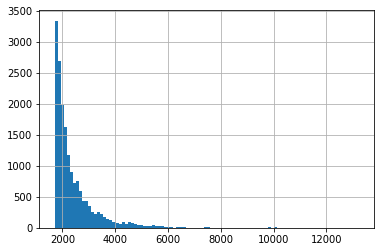

In [23]:
outlier_df['가격/대지권면적'].hist(bins=100)

In [24]:
lower_df = concat_df[concat_df['가격/대지권면적'] < concat_df['가격/대지권면적'].quantile(0.01)]

<AxesSubplot:>

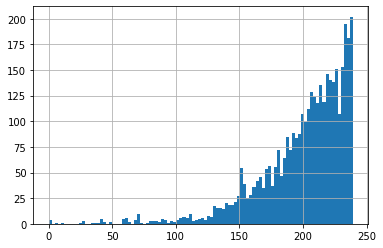

In [25]:
lower_df['가격/대지권면적'].hist(bins=100)

In [26]:
upper_df = concat_df[concat_df['가격/대지권면적'] > concat_df['가격/대지권면적'].quantile(0.99)]

<AxesSubplot:>

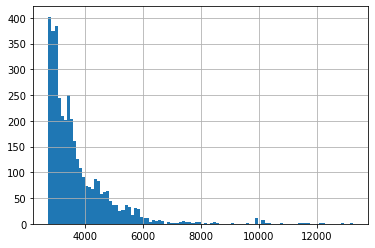

In [27]:
upper_df['가격/대지권면적'].hist(bins=100)

In [28]:
concat_df = concat_df[(concat_df['가격/대지권면적'] >= 100)&(concat_df['가격/대지권면적'] <= 7000)]
print(concat_df.shape)

(377429, 17)


<AxesSubplot:>

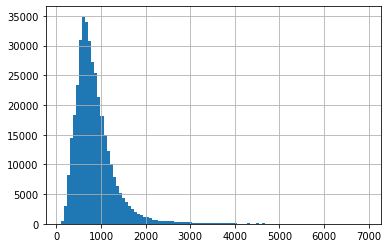

In [29]:
concat_df['가격/대지권면적'].hist(bins=100)

In [30]:
max_df = concat_df[concat_df['가격/대지권면적'] == concat_df['가격/대지권면적'].max()]
print(max_df.shape)

(1, 17)


In [31]:
max_df

,시군구,번지,본번,부번,건물명,전용면적,대지권면적,계약년월,계약일,거래금액(만원),층,건축년도,도로명,계약년도,건물연식,가격/전용면적,가격/대지권면적
351211,서울특별시 서초구 방배동,541-43,541,43,동양빌라(541-43),28.23,12.85,202008,1,89000,-1,1996.0,효령로14마길 17,2020,24.0,3152.67446,6926.070039


In [32]:
addr_df = concat_df[(concat_df['시군구'] == max_df['시군구'].iloc[0])&(concat_df['번지'] == max_df['번지'].iloc[0])]
print(addr_df.shape)

(5, 17)


In [33]:
addr_df

,시군구,번지,본번,부번,건물명,전용면적,대지권면적,계약년월,계약일,거래금액(만원),층,건축년도,도로명,계약년도,건물연식,가격/전용면적,가격/대지권면적
17586,서울특별시 서초구 방배동,541-43,541,43,동양빌라(541-43),28.23,12.85,201306,24,15000,-1,1996.0,효령로14마길 17,2013,17.0,531.349628,1167.315175
151272,서울특별시 서초구 방배동,541-43,541,43,동양빌라(541-43),28.23,12.85,201605,24,18000,-1,1996.0,효령로14마길 17,2016,20.0,637.619554,1400.778210
204885,서울특별시 서초구 방배동,541-43,541,43,동양빌라(541-43),28.23,12.85,201706,15,23500,-1,1996.0,효령로14마길 17,2017,21.0,832.447751,1828.793774
204886,서울특별시 서초구 방배동,541-43,541,43,동양빌라(541-43),49.16,24.82,201707,15,42200,-1,1996.0,효령로14마길 17,2017,21.0,858.421481,1700.241741
351211,서울특별시 서초구 방배동,541-43,541,43,동양빌라(541-43),28.23,12.85,202008,1,89000,-1,1996.0,효령로14마길 17,2020,24.0,3152.674460,6926.070039


In [34]:
%%time
main_data_df = pd.read_csv('./prepped_data/main_data_monthly_converted.csv')
print(main_data_df.shape)
main_data_df.head()

(4441027, 17)
Wall time: 9.47 s


,전월세매매구분,전용면적(㎡),계약일,금액(만원),층,건축년도,가격/면적,년,월,target_log_transformed,target/area_log_transformed,건물종류,지번주소,도로명주소,X좌표,Y좌표,주택가격지수
0,매매,77.75,8,57000.0,2,1988,733.118971,2013,9,10.950807,6.597308,아파트,서울특별시 강남구 개포동 655-2,서울특별시 강남구 언주로 103-0,960473.743425,1.942553e+06,79.100
1,매매,77.75,16,57000.0,2,1988,733.118971,2013,12,10.950807,6.597308,아파트,서울특별시 강남구 개포동 655-2,서울특별시 강남구 언주로 103-0,960473.743425,1.942553e+06,79.213
2,매매,77.75,29,55000.0,7,1988,707.395498,2014,1,10.915088,6.561590,아파트,서울특별시 강남구 개포동 655-2,서울특별시 강남구 언주로 103-0,960473.743425,1.942553e+06,79.451
3,매매,77.75,10,59500.0,4,1988,765.273312,2014,11,10.993732,6.640233,아파트,서울특별시 강남구 개포동 655-2,서울특별시 강남구 언주로 103-0,960473.743425,1.942553e+06,82.100
4,매매,77.75,28,75000.0,5,1988,964.630225,2016,3,11.225243,6.871745,아파트,서울특별시 강남구 개포동 655-2,서울특별시 강남구 언주로 103-0,960473.743425,1.942553e+06,89.466


In [35]:
main_data_df.rename(columns={'전용면적(㎡)':'전용면적'}, inplace=True)

In [36]:
concat_df.head()

,시군구,번지,본번,부번,건물명,전용면적,대지권면적,계약년월,계약일,거래금액(만원),층,건축년도,도로명,계약년도,건물연식,가격/전용면적,가격/대지권면적
0,서울특별시 강남구 개포동,1172-2,1172,2,(1172-2),42.15,24.67,201304,26,25000,3,2012.0,논현로6길 22-6,2013,1.0,593.119810,1013.376571
1,서울특별시 강남구 개포동,1172-2,1172,2,(1172-2),42.15,24.67,201306,4,25000,3,2012.0,논현로6길 22-6,2013,1.0,593.119810,1013.376571
2,서울특별시 강남구 개포동,1172-2,1172,2,(1172-2),42.15,24.67,201310,25,24500,2,2012.0,논현로6길 22-6,2013,1.0,581.257414,993.109039
3,서울특별시 강남구 개포동,1216-4,1216,4,(1216-4),37.18,23.86,201302,13,27800,5,2012.0,개포로26길 16,2013,1.0,747.713825,1165.129925
4,서울특별시 강남구 개포동,1216-4,1216,4,(1216-4),35.87,23.02,201304,26,26500,3,2012.0,개포로26길 16,2013,1.0,738.778924,1151.172893


In [37]:
def landnum_modifier(x):
    # x is a string
    if pd.isna(x) == True:
        return x
    else:
        x = str(x)
        splitted = x.split('-')
        if len(splitted) == 1:
            return x + '-0'
        else:
            return x

In [38]:
concat_df['번지'] = concat_df['번지'].apply(landnum_modifier)

In [39]:
concat_df['지번주소'] = concat_df['시군구'] + ' ' + concat_df['번지']

In [40]:
concat_df.head()

,시군구,번지,본번,부번,건물명,전용면적,대지권면적,계약년월,계약일,거래금액(만원),층,건축년도,도로명,계약년도,건물연식,가격/전용면적,가격/대지권면적,지번주소
0,서울특별시 강남구 개포동,1172-2,1172,2,(1172-2),42.15,24.67,201304,26,25000,3,2012.0,논현로6길 22-6,2013,1.0,593.119810,1013.376571,서울특별시 강남구 개포동 1172-2
1,서울특별시 강남구 개포동,1172-2,1172,2,(1172-2),42.15,24.67,201306,4,25000,3,2012.0,논현로6길 22-6,2013,1.0,593.119810,1013.376571,서울특별시 강남구 개포동 1172-2
2,서울특별시 강남구 개포동,1172-2,1172,2,(1172-2),42.15,24.67,201310,25,24500,2,2012.0,논현로6길 22-6,2013,1.0,581.257414,993.109039,서울특별시 강남구 개포동 1172-2
3,서울특별시 강남구 개포동,1216-4,1216,4,(1216-4),37.18,23.86,201302,13,27800,5,2012.0,개포로26길 16,2013,1.0,747.713825,1165.129925,서울특별시 강남구 개포동 1216-4
4,서울특별시 강남구 개포동,1216-4,1216,4,(1216-4),35.87,23.02,201304,26,26500,3,2012.0,개포로26길 16,2013,1.0,738.778924,1151.172893,서울특별시 강남구 개포동 1216-4


In [41]:
concat_df['월'] = concat_df['계약년월'].apply(lambda x: int(str(x)[-2:]))

In [42]:
concat_df.rename(columns={'계약년도':'년'}, inplace=True)

In [43]:
concat_df.head()

,시군구,번지,본번,부번,건물명,전용면적,대지권면적,계약년월,계약일,거래금액(만원),층,건축년도,도로명,년,건물연식,가격/전용면적,가격/대지권면적,지번주소,월
0,서울특별시 강남구 개포동,1172-2,1172,2,(1172-2),42.15,24.67,201304,26,25000,3,2012.0,논현로6길 22-6,2013,1.0,593.119810,1013.376571,서울특별시 강남구 개포동 1172-2,4
1,서울특별시 강남구 개포동,1172-2,1172,2,(1172-2),42.15,24.67,201306,4,25000,3,2012.0,논현로6길 22-6,2013,1.0,593.119810,1013.376571,서울특별시 강남구 개포동 1172-2,6
2,서울특별시 강남구 개포동,1172-2,1172,2,(1172-2),42.15,24.67,201310,25,24500,2,2012.0,논현로6길 22-6,2013,1.0,581.257414,993.109039,서울특별시 강남구 개포동 1172-2,10
3,서울특별시 강남구 개포동,1216-4,1216,4,(1216-4),37.18,23.86,201302,13,27800,5,2012.0,개포로26길 16,2013,1.0,747.713825,1165.129925,서울특별시 강남구 개포동 1216-4,2
4,서울특별시 강남구 개포동,1216-4,1216,4,(1216-4),35.87,23.02,201304,26,26500,3,2012.0,개포로26길 16,2013,1.0,738.778924,1151.172893,서울특별시 강남구 개포동 1216-4,4


In [44]:
concat_df['년'].dtype

dtype('int64')

In [45]:
main_data_df['년'].dtype

dtype('int64')

In [46]:
main_data_df['월'].dtype

dtype('int64')

In [47]:
selected_cols = ['지번주소', '년', '전용면적', '대지권면적']
selected_df = concat_df[selected_cols].drop_duplicates()
print(selected_df.shape)
selected_df.head()

(289774, 4)


,지번주소,년,전용면적,대지권면적
0,서울특별시 강남구 개포동 1172-2,2013,42.15,24.67
3,서울특별시 강남구 개포동 1216-4,2013,37.18,23.86
4,서울특별시 강남구 개포동 1216-4,2013,35.87,23.02
5,서울특별시 강남구 개포동 1205-1,2013,51.69,31.15
6,서울특별시 강남구 개포동 1205-1,2013,46.29,27.89


In [48]:
merge_df = main_data_df.merge(selected_df, on=['지번주소', '년', '전용면적'])
print(merge_df.shape)

(475957, 18)


In [49]:
merge_df['건물종류'].value_counts()

다세대연립    475539
오피스텔        248
아파트         170
Name: 건물종류, dtype: int64

In [50]:
merge_df = merge_df[merge_df['건물종류'] == '다세대연립']
print(merge_df.shape)
merge_df.head()

(475539, 18)


,전월세매매구분,전용면적,계약일,금액(만원),층,건축년도,가격/면적,년,월,target_log_transformed,target/area_log_transformed,건물종류,지번주소,도로명주소,X좌표,Y좌표,주택가격지수,대지권면적
0,매매,153.43,26,300000.0,3,1984,1955.289057,2014,8,12.611538,7.578293,다세대연립,서울특별시 강남구 대치동 894-0,서울특별시 강남구 삼성로85길 33-0,960635.440103,1.945112e+06,94.695447,161.50
1,매매,153.43,24,300000.0,3,1984,1955.289057,2015,3,12.611538,7.578293,다세대연립,서울특별시 강남구 대치동 894-0,서울특별시 강남구 삼성로85길 33-0,960635.440103,1.945112e+06,95.462885,161.50
2,매매,153.43,24,300000.0,1,1984,1955.289057,2015,3,12.611538,7.578293,다세대연립,서울특별시 강남구 대치동 894-0,서울특별시 강남구 삼성로85길 33-0,960635.440103,1.945112e+06,95.462885,161.50
3,매매,153.43,24,300000.0,2,1984,1955.289057,2015,3,12.611538,7.578293,다세대연립,서울특별시 강남구 대치동 894-0,서울특별시 강남구 삼성로85길 33-0,960635.440103,1.945112e+06,95.462885,161.50
4,매매,102.38,5,68000.0,3,1986,664.192225,2016,5,11.127263,6.498572,다세대연립,서울특별시 강남구 역삼동 745-34,서울특별시 강남구 역삼로19길 25-0,959105.026874,1.944278e+06,97.854312,73.25


In [51]:
merge_df['전월세매매구분'].value_counts()

매매    347479
전세    128060
Name: 전월세매매구분, dtype: int64

In [52]:
merge_df = merge_df[merge_df['전월세매매구분'] == '매매']
print(merge_df.shape)

(347479, 18)


In [53]:
merge_df['가격/대지권면적'] = merge_df['금액(만원)'] / merge_df['대지권면적']

In [54]:
merge_df['건물연식'] = merge_df['년'] - merge_df['건축년도']

In [55]:
cols_to_keep = ['지번주소', '도로명주소', 'X좌표', 'Y좌표', '건물연식', '년', '월', '계약일', '금액(만원)', '가격/대지권면적']
merge_df = merge_df[cols_to_keep]
print(merge_df.shape)
merge_df.head()

(347479, 10)


,지번주소,도로명주소,X좌표,Y좌표,건물연식,년,월,계약일,금액(만원),가격/대지권면적
0,서울특별시 강남구 대치동 894-0,서울특별시 강남구 삼성로85길 33-0,960635.440103,1.945112e+06,30,2014,8,26,300000.0,1857.585139
1,서울특별시 강남구 대치동 894-0,서울특별시 강남구 삼성로85길 33-0,960635.440103,1.945112e+06,31,2015,3,24,300000.0,1857.585139
2,서울특별시 강남구 대치동 894-0,서울특별시 강남구 삼성로85길 33-0,960635.440103,1.945112e+06,31,2015,3,24,300000.0,1857.585139
3,서울특별시 강남구 대치동 894-0,서울특별시 강남구 삼성로85길 33-0,960635.440103,1.945112e+06,31,2015,3,24,300000.0,1857.585139
4,서울특별시 강남구 역삼동 745-34,서울특별시 강남구 역삼로19길 25-0,959105.026874,1.944278e+06,30,2016,5,5,68000.0,928.327645


In [56]:
merge_df.to_csv('./prepped_data/yunrip_main_data_ver_1.csv', index=False)